Installing kaggle to get dataset directly with my token in kaggle

In [ ]:
!pip install Kaggle


Uploading my API token from my profile in kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"nasimeshaghian","key":"363685fe5b151c24adc0102e757d4d8d"}'}

In [ ]:
!mkdir ~/.kaggle

In [ ]:
!mv kaggle.json /root/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d einsteindata4u/covid19

  0% 0.00/556k [00:00<?, ?B/s]
100% 556k/556k [00:00<00:00, 88.8MB/s]


In [ ]:
!mkdir Dataset

In [ ]:
! unzip covid19.zip -d Dataset

Archive:  covid19.zip
  inflating: Dataset/dataset.xlsx    


In [ ]:
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
import pandas as pd

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, precision_score, recall_score
from sklearn.ensemble import ExtraTreesClassifier
import warnings
warnings.filterwarnings('ignore')

np.random.seed(1)

In [ ]:
file = pd.read_excel('Dataset/dataset.xlsx')

In [ ]:
file.head()

,Patient ID,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,...,Hb saturation (arterial blood gases),pCO2 (arterial blood gas analysis),Base excess (arterial blood gas analysis),pH (arterial blood gas analysis),Total CO2 (arterial blood gas analysis),HCO3 (arterial blood gas analysis),pO2 (arterial blood gas analysis),Arteiral Fio2,Phosphor,ctO2 (arterial blood gas analysis)
0,44477f75e8169d2,13,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,126e9dd13932f68,17,negative,0,0,0,0.236515,-0.02234,-0.517413,0.010677,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,a46b4402a0e5696,8,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,f7d619a94f97c45,5,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,d9e41465789c2b5,15,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


openpyxl is a library for reading or writing in excel file for data analysis

In [ ]:
!pip install openpyxl

In [ ]:
data = pd.read_excel("Dataset/dataset.xlsx", engine="openpyxl")

In [ ]:
data.info()
data.describe()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5644 entries, 0 to 5643
Columns: 111 entries, Patient ID to ctO2 (arterial blood gas analysis)
dtypes: float64(70), int64(4), object(37)
memory usage: 4.8+ MB


,Patient ID,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,...,Hb saturation (arterial blood gases),pCO2 (arterial blood gas analysis),Base excess (arterial blood gas analysis),pH (arterial blood gas analysis),Total CO2 (arterial blood gas analysis),HCO3 (arterial blood gas analysis),pO2 (arterial blood gas analysis),Arteiral Fio2,Phosphor,ctO2 (arterial blood gas analysis)
0,44477f75e8169d2,13,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,126e9dd13932f68,17,negative,0,0,0,0.236515,-0.02234,-0.517413,0.010677,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,a46b4402a0e5696,8,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,f7d619a94f97c45,5,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,d9e41465789c2b5,15,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


lower is fo converting all uppercase characters to lowercase. strip removes whitespaces from the start and end of the string.

In [ ]:
data.columns = [x.lower().strip().replace(' ','_') for x in data.columns]

creating a table consist of total miss data for each column and their percentage and type of each coulumn.

In [ ]:
def miss_data(x):
    total = x.isnull().sum()
    percent = (x.isnull().sum()/x.isnull().count()*100)
    tt = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    types = []
    for col in data.columns:
        dtype = str(x[col].dtype)
        types.append(dtype)
    tt['Types'] = types
    return(np.transpose(tt))

In [ ]:
miss_data(data)

,patient_id,patient_age_quantile,sars-cov-2_exam_result,"patient_addmited_to_regular_ward_(1=yes,_0=no)","patient_addmited_to_semi-intensive_unit_(1=yes,_0=no)","patient_addmited_to_intensive_care_unit_(1=yes,_0=no)",hematocrit,hemoglobin,platelets,mean_platelet_volume,...,hb_saturation_(arterial_blood_gases),pco2_(arterial_blood_gas_analysis),base_excess_(arterial_blood_gas_analysis),ph_(arterial_blood_gas_analysis),total_co2_(arterial_blood_gas_analysis),hco3_(arterial_blood_gas_analysis),po2_(arterial_blood_gas_analysis),arteiral_fio2,phosphor,cto2_(arterial_blood_gas_analysis)
Total,0,0,0,0,0,0,5041,5041,5042,5045,...,5617,5617,5617,5617,5617,5617,5617,5624,5624,5617
Percent,0.0,0.0,0.0,0.0,0.0,0.0,89.316088,89.316088,89.333806,89.38696,...,99.521616,99.521616,99.521616,99.521616,99.521616,99.521616,99.521616,99.645641,99.645641,99.521616
Types,object,int64,object,int64,int64,int64,float64,float64,float64,float64,...,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64


Eliminating columns with higher percent of null values and converting sars-cov-2_exam_result to y

In [ ]:
for x in data.columns:
    if data[x].dtype=='float16' or  data[x].dtype=='float32' or  data[x].dtype=='float64':
        data[x].fillna(data[x].mean())

data = data.fillna(-999)

for y in data.columns:
    if data[y].dtype=='object':
        lbl = LabelEncoder()
        lbl.fit(list(data[y].values))
        data[y] = lbl.transform(list(data[y].values))

In [ ]:
data.head()

,patient_id,patient_age_quantile,sars-cov-2_exam_result,"patient_addmited_to_regular_ward_(1=yes,_0=no)","patient_addmited_to_semi-intensive_unit_(1=yes,_0=no)","patient_addmited_to_intensive_care_unit_(1=yes,_0=no)",hematocrit,hemoglobin,platelets,mean_platelet_volume,...,hb_saturation_(arterial_blood_gases),pco2_(arterial_blood_gas_analysis),base_excess_(arterial_blood_gas_analysis),ph_(arterial_blood_gas_analysis),total_co2_(arterial_blood_gas_analysis),hco3_(arterial_blood_gas_analysis),po2_(arterial_blood_gas_analysis),arteiral_fio2,phosphor,cto2_(arterial_blood_gas_analysis)
0,1588,13,0,0,0,0,-999.000000,-999.00000,-999.000000,-999.000000,...,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0
1,451,17,0,0,0,0,0.236515,-0.02234,-0.517413,0.010677,...,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0
2,3669,8,0,0,0,0,-999.000000,-999.00000,-999.000000,-999.000000,...,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0
3,5457,5,0,0,0,0,-999.000000,-999.00000,-999.000000,-999.000000,...,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0
4,4843,15,0,0,0,0,-999.000000,-999.00000,-999.000000,-999.000000,...,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0


Finding the correlation between columns

In [ ]:
threshold = 0.92

corr_matrix = data.corr().abs()
corr_matrix.head()

,patient_id,patient_age_quantile,sars-cov-2_exam_result,"patient_addmited_to_regular_ward_(1=yes,_0=no)","patient_addmited_to_semi-intensive_unit_(1=yes,_0=no)","patient_addmited_to_intensive_care_unit_(1=yes,_0=no)",hematocrit,hemoglobin,platelets,mean_platelet_volume,...,hb_saturation_(arterial_blood_gases),pco2_(arterial_blood_gas_analysis),base_excess_(arterial_blood_gas_analysis),ph_(arterial_blood_gas_analysis),total_co2_(arterial_blood_gas_analysis),hco3_(arterial_blood_gas_analysis),po2_(arterial_blood_gas_analysis),arteiral_fio2,phosphor,cto2_(arterial_blood_gas_analysis)
patient_id,1.000000,0.014136,0.018664,0.003748,0.004803,0.000162,0.002173,0.002167,0.001974,0.002017,...,0.002856,0.002832,0.002847,0.002854,0.002839,0.002840,0.002850,0.005929,0.007077,0.002847
patient_age_quantile,0.014136,1.000000,0.075244,0.046166,0.015736,0.035772,0.109140,0.109128,0.109860,0.107703,...,0.051720,0.051703,0.051778,0.051778,0.051743,0.051749,0.051730,0.050366,0.020413,0.051732
sars-cov-2_exam_result,0.018664,0.075244,1.000000,0.142437,0.019364,0.027586,0.044974,0.044976,0.045045,0.042017,...,0.088889,0.088836,0.088889,0.088910,0.088845,0.088849,0.088910,0.070122,0.009768,0.088905
"patient_addmited_to_regular_ward_(1=yes,_0=no)",0.003748,0.046166,0.142437,1.000000,0.011264,0.010192,0.241889,0.241885,0.242051,0.238041,...,0.144795,0.144685,0.144753,0.144797,0.144703,0.144710,0.144771,0.145138,0.007105,0.144815
"patient_addmited_to_semi-intensive_unit_(1=yes,_0=no)",0.004803,0.015736,0.019364,0.011264,1.000000,0.008087,0.224213,0.224218,0.224609,0.225239,...,0.267281,0.267521,0.267400,0.267417,0.267440,0.267432,0.267359,0.153438,0.185337,0.267463


triu is used for getting  the upper triangle of correlation array.

In [ ]:
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
upper.head()

,patient_id,patient_age_quantile,sars-cov-2_exam_result,"patient_addmited_to_regular_ward_(1=yes,_0=no)","patient_addmited_to_semi-intensive_unit_(1=yes,_0=no)","patient_addmited_to_intensive_care_unit_(1=yes,_0=no)",hematocrit,hemoglobin,platelets,mean_platelet_volume,...,hb_saturation_(arterial_blood_gases),pco2_(arterial_blood_gas_analysis),base_excess_(arterial_blood_gas_analysis),ph_(arterial_blood_gas_analysis),total_co2_(arterial_blood_gas_analysis),hco3_(arterial_blood_gas_analysis),po2_(arterial_blood_gas_analysis),arteiral_fio2,phosphor,cto2_(arterial_blood_gas_analysis)
patient_id,NaN,0.014136,0.018664,0.003748,0.004803,0.000162,0.002173,0.002167,0.001974,0.002017,...,0.002856,0.002832,0.002847,0.002854,0.002839,0.002840,0.002850,0.005929,0.007077,0.002847
patient_age_quantile,NaN,NaN,0.075244,0.046166,0.015736,0.035772,0.109140,0.109128,0.109860,0.107703,...,0.051720,0.051703,0.051778,0.051778,0.051743,0.051749,0.051730,0.050366,0.020413,0.051732
sars-cov-2_exam_result,NaN,NaN,NaN,0.142437,0.019364,0.027586,0.044974,0.044976,0.045045,0.042017,...,0.088889,0.088836,0.088889,0.088910,0.088845,0.088849,0.088910,0.070122,0.009768,0.088905
"patient_addmited_to_regular_ward_(1=yes,_0=no)",NaN,NaN,NaN,NaN,0.011264,0.010192,0.241889,0.241885,0.242051,0.238041,...,0.144795,0.144685,0.144753,0.144797,0.144703,0.144710,0.144771,0.145138,0.007105,0.144815
"patient_addmited_to_semi-intensive_unit_(1=yes,_0=no)",NaN,NaN,NaN,NaN,NaN,0.008087,0.224213,0.224218,0.224609,0.225239,...,0.267281,0.267521,0.267400,0.267417,0.267440,0.267432,0.267359,0.153438,0.185337,0.267463


Due to their linear dependence, two highly correlated variables can have nearly the same ability to predict the outcome value for an observation (Vishal, 2018). Removing one of the correlated variables before training the model benefits the learning process and can result in a similar performance to the full model. so we delete highly related features for preprocessing

In [ ]:
to_drop = [column for column in upper.columns if any(upper[column] > threshold)]

print('There are %d columns to remove.' % (len(to_drop)))
dataset = data.drop(columns = to_drop)
print('Data shape: ', data.shape)
print('Size of the data', data.shape)

There are 64 columns to remove.
Data shape:  (5644, 111)
Size of the data (5644, 111)


calculate percentage of null data and sort descenting them

In [ ]:
data_missing = (data.isnull().sum() / len(data)).sort_values(ascending = False)
data_missing.head()

patient_id              0.0
myeloblasts             0.0
urine_-_sugar           0.0
urine_-_protein         0.0
urine_-_urobilinogen    0.0
dtype: float64

delete columns with null data more than 85%

In [ ]:
data_missing_ = data_missing.index[data_missing > 0.85]
all_missing = list(set(data_missing_))

In [ ]:
dataset = dataset.drop(columns = all_missing)

In [ ]:
dataset.head()

,patient_id,patient_age_quantile,sars-cov-2_exam_result,"patient_addmited_to_regular_ward_(1=yes,_0=no)","patient_addmited_to_semi-intensive_unit_(1=yes,_0=no)","patient_addmited_to_intensive_care_unit_(1=yes,_0=no)",hematocrit,serum_glucose,respiratory_syncytial_virus,mycoplasma_pneumoniae,...,"prothrombin_time_(pt),_activity",vitamin_b12,creatine_phosphokinase (cpk),ferritin,arterial_lactic_acid,lipase_dosage,d-dimer,albumin,arteiral_fio2,phosphor
0,1588,13,0,0,0,0,-999.000000,-999.000000,0,-999.0,...,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0
1,451,17,0,0,0,0,0.236515,-0.140648,2,-999.0,...,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0
2,3669,8,0,0,0,0,-999.000000,-999.000000,0,-999.0,...,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0
3,5457,5,0,0,0,0,-999.000000,-999.000000,0,-999.0,...,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0
4,4843,15,0,0,0,0,-999.000000,-999.000000,2,-999.0,...,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5644 entries, 0 to 5643
Data columns (total 47 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   patient_id                                             5644 non-null   int64  
 1   patient_age_quantile                                   5644 non-null   int64  
 2   sars-cov-2_exam_result                                 5644 non-null   int64  
 3   patient_addmited_to_regular_ward_(1=yes,_0=no)         5644 non-null   int64  
 4   patient_addmited_to_semi-intensive_unit_(1=yes,_0=no)  5644 non-null   int64  
 5   patient_addmited_to_intensive_care_unit_(1=yes,_0=no)  5644 non-null   int64  
 6   hematocrit                                             5644 non-null   float64
 7   serum_glucose                                          5644 non-null   float64
 8   respiratory_syncytial_virus                     

In [ ]:
cols = [x for x in dataset.columns if x not in ['patient_id','sars-cov-2_exam_result', 'patient_addmited_to_regular_ward_(1=yes,_0=no)', 'patient_addmited_to_semi-intensive_unit_(1=yes,_0=no)', 'patient_addmited_to_intensive_care_unit_(1=yes,_0=no)']]

In [ ]:
new_df = dataset[cols]
new_df

,patient_age_quantile,hematocrit,serum_glucose,respiratory_syncytial_virus,mycoplasma_pneumoniae,neutrophils,urea,proteina_c_reativa_mg/dl,potassium,"influenza_b,_rapid_test",...,"prothrombin_time_(pt),_activity",vitamin_b12,creatine_phosphokinase (cpk),ferritin,arterial_lactic_acid,lipase_dosage,d-dimer,albumin,arteiral_fio2,phosphor
0,13,-999.000000,-999.000000,0,-999.0,-999.000000,-999.000000,-999.000000,-999.000000,0,...,-999.0,-999.0,-999.000000,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0
1,17,0.236515,-0.140648,2,-999.0,-0.619086,1.198059,-0.147895,-0.305787,1,...,-999.0,-999.0,-999.000000,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0
2,8,-999.000000,-999.000000,0,-999.0,-999.000000,-999.000000,-999.000000,-999.000000,0,...,-999.0,-999.0,-999.000000,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0
3,5,-999.000000,-999.000000,0,-999.0,-999.000000,-999.000000,-999.000000,-999.000000,0,...,-999.0,-999.0,-999.000000,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0
4,15,-999.000000,-999.000000,2,-999.0,-999.000000,-999.000000,-999.000000,-999.000000,0,...,-999.0,-999.0,-999.000000,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5639,3,-999.000000,-999.000000,0,-999.0,-999.000000,-999.000000,-999.000000,-999.000000,0,...,-999.0,-999.0,-999.000000,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0
5640,17,-999.000000,-999.000000,0,-999.0,-999.000000,-999.000000,-999.000000,-999.000000,0,...,-999.0,-999.0,-999.000000,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0
5641,4,-999.000000,-999.000000,0,-999.0,-999.000000,-999.000000,-999.000000,-999.000000,0,...,-999.0,-999.0,-999.000000,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0
5642,10,-999.000000,-999.000000,0,-999.0,-999.000000,-999.000000,-999.000000,-999.000000,0,...,-999.0,-999.0,-999.000000,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0


spliting data

In [ ]:
col = [x for x in new_df.columns if x not in ['label'] ]
X = new_df[col]
y = dataset['sars-cov-2_exam_result']
np.random.seed(1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state=101)
y_train = y_train.values.reshape(-1 , 1)
y_test = y_test.values.reshape(-1 , 1)

In [ ]:
new_df["label"] = y

Fisher's Linear Discriminant algorithm

In [ ]:
#positive_corona_mean = new_df.groupby('label').mean().loc[1]
#negative_corona_mean = new_df.groupby('label').mean().loc[0]
#positive_corona_variance = new_df.groupby('label').var().loc[1]
#negative_corona_variance = new_df.groupby('label').var().loc[0]
score = []
for column in (new_df):

  mu = new_df.loc[:,column].mean()

  n_1 = len(new_df[new_df['label'] == 1])
  mu_1 = (new_df[new_df['label']==1]).loc[:,column].mean()
  var_1 = (new_df[new_df['label']==1]).loc[:,column].var()

  n_2 = len(new_df[new_df['label'] == 0])
  mu_2 = (new_df[new_df['label']==0]).loc[:,column].mean()
  var_2 = (new_df[new_df['label']==0]).loc[:,column].var()

  score.append((n_1*(mu_1-mu)**2 + n_2*(mu_2-mu)**2 ) / ((n_1-1)*var_1 + (n_2-1)*var_2))
 # print('score=',score, 'for feature of',column,'with index of', (new_df.columns.get_loc(column)+1))


In [ ]:
score

[0.005693961075051061,
 0.002026761635652048,
 0.0015372304279004185,
 0.000739009466388719,
 nan,
 0.0025191178072414165,
 0.0021041939584440354,
 0.0017275695985639733,
 0.0026120737987819827,
 0.0011476033509237992,
 0.0029137436247907177,
 0.0029675785339172926,
 0.005493423285816536,
 4.439176516095552e-05,
 0.0022660222684468554,
 5.4600413791174074e-05,
 0.0006440232738559852,
 1.9442684846621776e-05,
 7.174169913428124e-06,
 0.0007883421595520034,
 0.0007434448191109473,
 0.00010351621096568015,
 0.00014551981328803207,
 0.0003571798871709653,
 1.94426848466223e-05,
 nan,
 0.00023076893433263682,
 0.00019027052835815836,
 nan,
 0.000801550476438337,
 0.0014876258665914356,
 0.005171635730946766,
 nan,
 5.835094628523653e-05,
 0.003159899469436032,
 6.458633605430623e-06,
 0.007958891606693493,
 0.0012171453406516514,
 nan,
 0.0002533525311756391,
 0.004941415846304996,
 9.542841138603842e-05,
 inf]

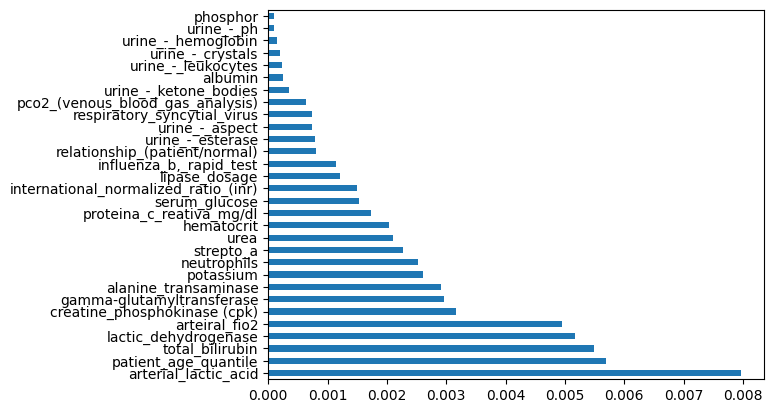

In [ ]:
feat_importances = pd.Series(score, index=new_df.columns)
feat_importances = feat_importances.drop(labels = ['label'])
feat_importances.nlargest(30).plot(kind='barh')
plt.show()

In [ ]:
sortedfeat =feat_importances.sort_values(ascending=False)
feat_head = sortedfeat.head(30)
feat_head.index

Index(['arterial_lactic_acid', 'patient_age_quantile', 'total_bilirubin',
       'lactic_dehydrogenase', 'arteiral_fio2', 'creatine_phosphokinase (cpk)',
       'gamma-glutamyltransferase', 'alanine_transaminase', 'potassium',
       'neutrophils', 'strepto_a', 'urea', 'hematocrit',
       'proteina_c_reativa_mg/dl', 'serum_glucose',
       'international_normalized_ratio_(inr)', 'lipase_dosage',
       'influenza_b,_rapid_test', 'relationship_(patient/normal)',
       'urine_-_esterase', 'urine_-_aspect', 'respiratory_syncytial_virus',
       'pco2_(venous_blood_gas_analysis)', 'urine_-_ketone_bodies', 'albumin',
       'urine_-_leukocytes', 'urine_-_crystals', 'urine_-_hemoglobin',
       'urine_-_ph', 'phosphor'],
      dtype='object')

In [ ]:
dataset_after_Fisher = new_df[feat_head.index]
y = new_df['label']


spliting dataset with features based on fisher scores

In [ ]:
np.random.seed(1)
xtrain_after_fisher, xtest_after_fisher, ytrain_after_fisher, ytest_after_fisher = train_test_split(dataset_after_Fisher, y, test_size = 0.33, random_state = 101)
ytrain_after_fisher = ytrain_after_fisher.values.reshape(-1 , 1)
ytest_after_fisher = ytest_after_fisher.values.reshape(-1 , 1)

classifying with fisher features compare with without fisher

In [ ]:
def model_assess(model, xtrain, ytrain, xtest, ytest, name='Default'):
    accuracy_lst =[]
    model.fit(xtrain, ytrain)
    prds = model.predict(xtest)
    model_acc = accuracy_score(ytest, prds)
    accuracy_lst.append(100*model_acc)
    return accuracy_lst

In [ ]:
xgb = XGBClassifier(n_estimators=1000, learning_rate=0.05)
#accuracy_fisher = model_assess(xgb, xtrain_after_fisher, ytrain_after_fisher, xtest_after_fisher, ytest_after_fisher, 'XGBoost')
#accuracy = model_assess(xgb,X_train, y_train, X_test, y_test, 'XGBoost')
#print('accuracy of model with fisher is: ' + str(accuracy_fisher) + ', and accuracy without it is: ' + str(accuracy))

Whale optimization algorithm

In [ ]:
import random
import math
import sys
import copy

fitness functions

In [ ]:
def Fitness_Function(xtrain, ytrain, xtest, ytest, X):
  if len(X.shape) == 0:
    cost = 1
  else:
    #xtrain, xtest, ytrain, ytest = train_test_split(feature , label , test_size = 0.33 , random_state = 101, stratify = label)
    model = LogisticRegression()
    model.fit(xtrain , ytrain)
    pred = model.predict(xtest)
    model_acc = accuracy_score(ytest , pred)
    cost = 1-model_acc

  return cost

In [ ]:
np.random.seed(1)
import numpy as np
from numpy.random import rand
def init_position(lb, ub, N, dim):
  X = np.zeros((N, dim), dtype= float)
  for i in range(N):
    for j in range(dim):
      X[i,j] = lb[0,j] + (ub[0,j] - lb[0,j]) * rand()
  return X

In [ ]:
def binary_convert(X, threshold, N, dim):
  X_binary = np.zeros((N, dim), dtype='int')
  for i in range(N):
    for j in range(dim):
      if X[i,j] < threshold:
        X_binary[i,j] = 0
      else:
        X_binary[i,j] = 1
    return X_binary

In [ ]:
def boundary(x, lb, ub):
  if x < lb:
    x = lb
  if x > ub:
    x = ub
  return x

In [ ]:
def jWOA(xtrain, ytrain, xtest, ytest, opts):
  #parameters
  lb = 0
  ub = 1
  threshold = 0.5
  b = 1
  N = opts["N"]
  max_iter = opts["T"]
  if 'b' in opts:
    b = opts["b"]

  #dimentions
  dim = np.size(xtrain, 1)
  if np.size(lb) == 1:
    lb = lb * np.ones((1,dim), dtype='float')
    ub = ub * np.ones((1,dim), dtype='float')

  #initialize position
  X_init = init_position(lb, ub, N, dim)

  #binary converting
  X_bin = binary_convert(X_init, threshold, N, dim)

  #fitness at first iteration
  #best position
  fit = np.zeros((N,1), dtype='float')
  #current position
  XGB1 = np.zeros((1,dim), dtype='float')
  fitG = float('inf')

  test_size = 0.3
  for i in range(N):
    fit[i,0] = Fitness_Function(xtrain, ytrain, xtest, ytest, X_bin[i,:])
    if fit[i,0] < fitG:
      XGB1[0,:] = X_init[i,:]
      fitG = fit[i,0]

  #pre
  curve = np.zeros((1,max_iter), dtype='float')
  t = 0

  curve[0,t] = fitG.copy()
  print("generation:"+str(t+1))
  print("best WOA:"+str(curve[0,t]))

  t += 1

  while t < max_iter:
    #define a, linearly decrease from 2 to 0
    a = 2 - t * (2 / max_iter)

    for i in range(N):
      A = 2 * a * rand() - a
      c = 2 * rand()
      p = rand()
      l = -1 + 2 * rand()
      #whale position update
      if p < 0.5:
        #encircling prey
        if abs(A) < 1:
          for d in range(dim):
            #compute distance
            distance = abs(c * XGB1[0,d] - X_init[i,d])
            #update position
            X_init[i,d] = XGB1[0,d] - A * distance
            X_init[i,d] = boundary(X_init[i,d], lb[0,d], ub[0,d])

        elif abs(A) >= 1:
          for d in range(dim):
            #select a random whale
            k = np.random.randint(low=0, high=N)
            #compute D
            distance = abs(c * X_init[k,d] - X_init[i,d])
            #position update
            X_init[i,d] = X_init[k,d] - A * distance
            X_init[i,d] = boundary(X_init[i,d], lb[0,d], ub[0,d])
      #bubble net attacking
      elif p >= 0.5:
        for d in range(dim):
          dist = abs(XGB1[0,d] - X_init[i,d])
          X_init[i,d] = dist * np.exp(b * l) * np.cos(2 * np.pi * l) + XGB1[0,d]
          # Boundary
          X_init[i,d] = boundary(X_init[i,d], lb[0,d], ub[0,d])

    # Binary conversion
    Xbin = binary_convert(X_init, threshold, N, dim)
    # Fitness
    for i in range(N):
      fit[i,0] = Fitness_Function(xtrain, ytrain, xtest, ytest, Xbin[i,:])
      if fit[i,0] < fitG:
        XGB1[0,:] = X_init[i,:]
        fitG = fit[i,0]

    # Store result
    curve[0,t] = fitG.copy()
    print("Generation:", t + 1)
    print("Best (WOA):", curve[0,t])
    t += 1

    Gbin = binary_convert(XGB1, threshold, 1, dim)
    Gbin = Gbin.reshape(dim)
    pos = np.asarray(range(0, dim))
    sel_index  = pos[Gbin == 1]
    num_feat   = len(sel_index)
    # Create dictionary
    woa_data = {'sf': sel_index, 'c': curve, 'nf': num_feat}

    return woa_data



perform feature selection

generation:1
best WOA:0.09769189479334406
Generation: 2
Best (WOA): 0.09769189479334406
Accuracy: [90.28448738593666, 90.28448738593666, 90.28448738593666, 90.28448738593666, 90.28448738593666, 90.28448738593666, 90.28448738593666, 90.28448738593666, 90.28448738593666, 90.28448738593666, 90.28448738593666, 90.28448738593666, 90.28448738593666, 90.28448738593666, 90.28448738593666, 90.28448738593666, 90.28448738593666, 90.28448738593666, 90.28448738593666, 90.28448738593666, 90.28448738593666, 90.28448738593666, 90.28448738593666, 90.28448738593666, 90.28448738593666, 90.28448738593666, 90.28448738593666, 90.28448738593666, 90.28448738593666, 90.28448738593666, 90.28448738593666, 90.28448738593666, 90.28448738593666, 90.28448738593666, 90.28448738593666, 90.28448738593666, 90.28448738593666, 90.28448738593666, 90.28448738593666, 90.28448738593666, 90.28448738593666, 90.28448738593666, 90.28448738593666, 90.28448738593666, 90.28448738593666, 90.28448738593666, 90.28448738593666, 90.28448

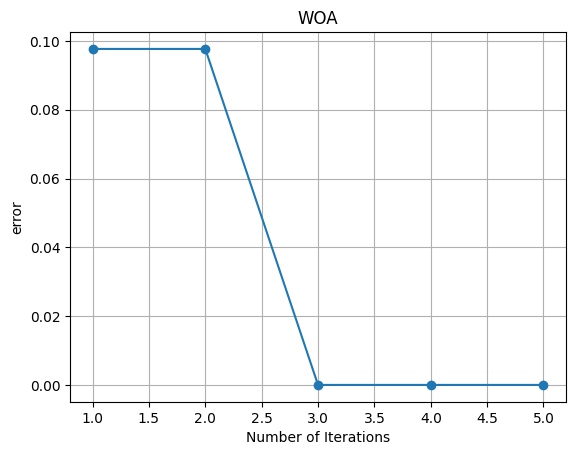

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
#columnss = [x for x in new_df.columns if x not in ['label']]
#features = new_df[columnss]
#Label = new_df['label']

#xtrain, xtest, ytrain, ytest = train_test_split(features, Label, test_size=0.33, stratify=Label)
fold = {'xt':X_train, 'yt':y_train, 'xv':X_test, 'yv':y_test}

# parameter
k    = 5     # k-value in KNN
N    = 20    # number of particles
T    = 5   # maximum number of iterations
opts = {'k':k, 'fold':fold, 'N':N, 'T':T}

# perform feature selection
fmdl = jWOA(X_train, y_train, X_test, y_test, opts)
sf   = fmdl['sf']

# model with selected features
num_train = np.size(X_train, 0)
num_valid = np.size(X_test, 0)
index_list_woa = sf.tolist()
colum = X_train.keys()
new_columns = colum[index_list_woa]

x_train_WOA   = X_train[new_columns]
y_train_WOA   = y_train
x_test_WOA   = X_test[new_columns]
y_test_WOA   = y_test

mdl       = KNeighborsClassifier(n_neighbors = k)
#dl.fit(x_train_WOA, y_train_WOA)

# accuracy
#y_pred        = mdl.predict(x_test_WOA)
Acc_after_WOA = model_assess(mdl, x_train_WOA, y_train_WOA, x_test_WOA, y_test_WOA, name='defualt')
print("Accuracy:", 100 * Acc_after_WOA)

# number of selected features
num_feat = fmdl['nf']
print("Feature Size:", num_feat)

# plot convergence
curve   = fmdl['c']
curve   = curve.reshape(np.size(curve,1))
x_plot       = np.arange(0, opts['T'], 1.0) + 1.0

fig, ax = plt.subplots()
ax.plot(x_plot, curve, 'o-')
ax.set_xlabel('Number of Iterations')
ax.set_ylabel('error')
ax.set_title('WOA')

ax.grid()
plt.show()


select features by Whale optimization algorithm and compare accuracy with model without feature selection

combine fisher and whale feature selection

In [ ]:
xtrain_after_fisher.head()

,arterial_lactic_acid,patient_age_quantile,total_bilirubin,lactic_dehydrogenase,arteiral_fio2,creatine_phosphokinase (cpk),gamma-glutamyltransferase,alanine_transaminase,potassium,neutrophils,...,urine_-_aspect,respiratory_syncytial_virus,pco2_(venous_blood_gas_analysis),urine_-_ketone_bodies,albumin,urine_-_leukocytes,urine_-_crystals,urine_-_hemoglobin,urine_-_ph,phosphor
5248,-999.0,17,-999.0,-999.0,-999.0,-999.0,-999.0,-0.448998,-999.0,-999.0,...,0,0,-999.0,0,-999.0,0,0,0,0,-999.0
2253,-999.0,11,-999.0,-999.0,-999.0,-999.0,-999.0,-999.000000,-999.0,-999.0,...,0,0,-999.0,0,-999.0,0,0,0,0,-999.0
1394,-999.0,6,-999.0,-999.0,-999.0,-999.0,-999.0,-999.000000,-999.0,-999.0,...,0,0,-999.0,0,-999.0,0,0,0,0,-999.0
2662,-999.0,7,-999.0,-999.0,-999.0,-999.0,-999.0,-999.000000,-999.0,-999.0,...,0,0,-999.0,0,-999.0,0,0,0,0,-999.0
2784,-999.0,1,-999.0,-999.0,-999.0,-999.0,-999.0,-999.000000,-999.0,-999.0,...,0,2,-999.0,0,-999.0,0,0,0,0,-999.0


In [ ]:
#col = [x for x in new_df.columns if x not in ['label'] ]
#X = new_df[col]
#y = dataset['sars-cov-2_exam_result']

#xtrain_new, xtest_new, ytrain_new, ytest_new = train_test_split(X, y, test_size = 0.33, random_state=101)
#ytrain_new = ytrain_new.values.reshape(-1 , 1)
#ytest_new = ytest_new.values.reshape(-1 , 1)

#model = LogisticRegression()
#while t < repeat:
woa_data = jWOA(X_train, y_train, X_test, y_test, opts)
woa_fisher = jWOA(xtrain_after_fisher, ytrain_after_fisher, xtest_after_fisher, ytest_after_fisher, opts)

selected_feat_by_WOA = woa_data['sf']
num_of_selected_feat_woa = woa_data['nf']
  #print(str(num_of_selected_feat_woa) + str(selected_feat_by_WOA))

selected_feat_comb = woa_fisher['sf']
num_of_selected_feat_comb = woa_fisher['nf']
  #print(str(num_of_selected_feat_comb) + str(selected_feat_comb))

index_list_woa     = selected_feat_by_WOA.tolist()
columns_woa        = X_train.keys()
new_columns_woa    = columns_woa[index_list_woa]
xtrain_after_WOA   = X_train[new_columns_woa]
ytrain_after_WOA   = y_train
xtest_after_WOA    = X_test[new_columns_woa]
ytest_after_WOA    = y_test

index_list_comb   = selected_feat_comb.tolist()
columns_comb      = X_train.keys()
new_columns_comb  = columns_comb[index_list_comb]
xtrain_after_comb = X_train[new_columns_comb]
ytrain_after_comb = y_train
xtest_after_comb  = X_test[new_columns_comb]
ytest_after_comb  = y_test

#num_valid = np.size(X_test, 0)

#y = new_df['label']

Acc        = model_assess(xgb, X_train, y_train, X_test, y_test, name='XGBoost')
  #Acc_lst = np.append(Acc_lst, Acc)

Acc_fisher = model_assess(xgb,xtrain_after_fisher, ytrain_after_fisher, xtest_after_fisher, ytest_after_fisher, name='XGBoost')
  #Acc_fisher_lst = np.append(Acc_fisher_lst, Acc_fisher)

Acc_WOA    = model_assess(xgb,xtrain_after_WOA, ytrain_after_WOA, xtest_after_WOA, ytest_after_WOA, name='XGBoost')
  #Acc_WOA_lst = np.append(Acc_WOA_lst, Acc_WOA)

Acc_comb   = model_assess(xgb, xtrain_after_comb, ytrain_after_comb, xtest_after_comb, ytest_after_comb, name='XGBoost')
  #Acc_comb_lst = np.append(Acc_comb_lst, Acc_comb)


  #accuracy_comb = np.append(accuracy_comb , model_assess(XGB, xtrain_after_comb, ytrain_after_comb, xtest_after_comb, ytest_after_comb, 'XGBoost'))
  #accuracy_WOA = np.append(accuracy_WOA , model_assess(XGB, xtrain_after_WOA, ytrain_after_WOA, xtest_after_WOA, ytest_after_WOA, 'XGBoost'))
  #accuracy_fisher = np.append(accuracy_fisher , model_assess(xgb, xtrain_after_fisher, ytrain_after_fisher, xtest_after_fisher, ytest_after_fisher, 'XGBoost'))
  #accuracy = np.append(accuracy , model_assess(XGB, train_x, train_y, test_x, test_y, 'XGBoost'))
  #t +=1


#print('accuracy of model with WOA is: ' + str(accuracy_WOA) + ', and accuracy without it is: ' + str(accuracy))

generation:1
best WOA:0.09769189479334406
Generation: 2
Best (WOA): 0.09769189479334406
generation:1
best WOA:0.09822866344605474
Generation: 2
Best (WOA): 0.09822866344605474


In [ ]:
xtrain_after_comb.head()

,hematocrit,respiratory_syncytial_virus,proteina_c_reativa_mg/dl,gamma-glutamyltransferase,total_bilirubin,strepto_a,pco2_(venous_blood_gas_analysis),rods_#,urine_-_ketone_bodies,urine_-_nitrite,urine_-_sugar,urine_-_crystals,partial_thromboplastin_time (ptt)
5248,-0.587474,0,-0.402232,-999.0,-999.0,0,-999.0,-0.624373,0,0,-999.0,0,-999.0
2253,-999.000000,0,-999.000000,-999.0,-999.0,0,-999.0,-999.000000,0,0,-999.0,0,-999.0
1394,-999.000000,0,-999.000000,-999.0,-999.0,0,-999.0,-999.000000,0,0,-999.0,0,-999.0
2662,-999.000000,0,-999.000000,-999.0,-999.0,0,-999.0,-999.000000,0,0,-999.0,0,-999.0
2784,-999.000000,2,-999.000000,-999.0,-999.0,1,-999.0,-999.000000,0,0,-999.0,0,-999.0


In [ ]:
X_train.head()

,patient_age_quantile,hematocrit,serum_glucose,respiratory_syncytial_virus,mycoplasma_pneumoniae,neutrophils,urea,proteina_c_reativa_mg/dl,potassium,"influenza_b,_rapid_test",...,"prothrombin_time_(pt),_activity",vitamin_b12,creatine_phosphokinase (cpk),ferritin,arterial_lactic_acid,lipase_dosage,d-dimer,albumin,arteiral_fio2,phosphor
5248,17,-0.587474,-999.0,0,-999.0,-999.0,-0.886076,-0.402232,-999.0,1,...,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0
2253,11,-999.000000,-999.0,0,-999.0,-999.0,-999.000000,-999.000000,-999.0,0,...,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0
1394,6,-999.000000,-999.0,0,-999.0,-999.0,-999.000000,-999.000000,-999.0,0,...,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0
2662,7,-999.000000,-999.0,0,-999.0,-999.0,-999.000000,-999.000000,-999.0,0,...,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0
2784,1,-999.000000,-999.0,2,-999.0,-999.0,-999.000000,-999.000000,-999.0,0,...,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0


In [ ]:
new_columns

Index(['hematocrit', 'influenza_b,_rapid_test', 'gamma-glutamyltransferase',
       'ionized_calcium', 'magnesium', 'fio2_(venous_blood_gas_analysis)',
       'urine_-_aspect', 'urine_-_ph', 'urine_-_ketone_bodies',
       'urine_-_nitrite', 'urine_-_sugar', 'relationship_(patient/normal)',
       'prothrombin_time_(pt),_activity', 'vitamin_b12',
       'creatine_phosphokinase (cpk)', 'arterial_lactic_acid', 'lipase_dosage',
       'albumin', 'arteiral_fio2', 'phosphor'],
      dtype='object')

In [ ]:
print('acc without feature selection : ' + str(Acc) + 'acc with fisher : ' + str(Acc_fisher))
print('acc with WOA : ' + str(Acc_WOA) + 'acc with both fisher and WOA : ' + str(Acc_comb))

acc without feature selection : [90.06977992485238]acc with fisher : [90.2308105206656]
acc with WOA : [90.17713365539453]acc with both fisher and WOA : [89.69404186795491]


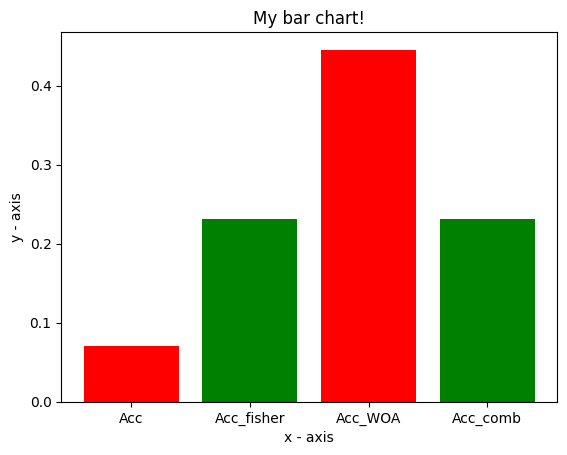

In [ ]:
# Using Numpy to create an array X
left = [1, 2, 3, 4]

# heights of bars
height = [0.06977, 0.23081, 0.44551, 0.23081]

# labels for bars
tick_label = ['Acc', 'Acc_fisher', 'Acc_WOA', 'Acc_comb']

# plotting a bar chart
plt.bar(left, height, tick_label = tick_label,
        width = 0.8, color = ['red', 'green'])

# naming the x-axis
plt.xlabel('x - axis')
# naming the y-axis
plt.ylabel('y - axis')
# plot title
plt.title('My bar chart!')

# function to show the plot
plt.show()

In [ ]:
new_df.head()

,patient_age_quantile,hematocrit,serum_glucose,respiratory_syncytial_virus,mycoplasma_pneumoniae,neutrophils,urea,proteina_c_reativa_mg/dl,potassium,"influenza_b,_rapid_test",...,vitamin_b12,creatine_phosphokinase (cpk),ferritin,arterial_lactic_acid,lipase_dosage,d-dimer,albumin,arteiral_fio2,phosphor,label
0,13,-999.000000,-999.000000,0,-999.0,-999.000000,-999.000000,-999.000000,-999.000000,0,...,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,0
1,17,0.236515,-0.140648,2,-999.0,-0.619086,1.198059,-0.147895,-0.305787,1,...,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,0
2,8,-999.000000,-999.000000,0,-999.0,-999.000000,-999.000000,-999.000000,-999.000000,0,...,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,0
3,5,-999.000000,-999.000000,0,-999.0,-999.000000,-999.000000,-999.000000,-999.000000,0,...,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,0
4,15,-999.000000,-999.000000,2,-999.0,-999.000000,-999.000000,-999.000000,-999.000000,0,...,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,0


In [ ]:
new_dataset          = new_df[new_columns_woa]
new_dataset['label'] = new_df['label']
X_new                = new_dataset[new_columns_woa]
y_new                = new_dataset['label']
xtrain_new, xtest_new, ytrain_new, ytest_new = train_test_split(X_new, y_new, test_size = 0.33, random_state=101)
ytrain_new = ytrain_new.values.reshape(-1 , 1)
ytest_new  = ytest_new.values.reshape(-1 , 1)
new_dataset.head()

,mycoplasma_pneumoniae,neutrophils,proteina_c_reativa_mg/dl,"influenza_b,_rapid_test",alanine_transaminase,gamma-glutamyltransferase,ionized_calcium,strepto_a,pco2_(venous_blood_gas_analysis),fio2_(venous_blood_gas_analysis),...,partial_thromboplastin_time (ptt),relationship_(patient/normal),international_normalized_ratio_(inr),lactic_dehydrogenase,"prothrombin_time_(pt),_activity",vitamin_b12,lipase_dosage,albumin,arteiral_fio2,label
0,-999.0,-999.000000,-999.000000,0,-999.0,-999.0,-999.0,0,-999.0,-999.0,...,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,0
1,-999.0,-0.619086,-0.147895,1,-999.0,-999.0,-999.0,0,-999.0,-999.0,...,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,0
2,-999.0,-999.000000,-999.000000,0,-999.0,-999.0,-999.0,0,-999.0,-999.0,...,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,0
3,-999.0,-999.000000,-999.000000,0,-999.0,-999.0,-999.0,0,-999.0,-999.0,...,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,0
4,-999.0,-999.000000,-999.000000,0,-999.0,-999.0,-999.0,0,-999.0,-999.0,...,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,0


In [ ]:
# Logistic Regression
lg = LogisticRegression()
Acc_lg = model_assess(lg, xtrain_new, ytrain_new, xtest_new, ytest_new, name = 'Logistic Regression')

# Decision Tree
tree = DecisionTreeClassifier()
Acc_tree = model_assess(tree, xtrain_new, ytrain_new, xtest_new, ytest_new,'Decission Trees')

# Random Forest
rforest = RandomForestClassifier(n_estimators=1000, max_depth=10, random_state=0)
Acc_rforest = model_assess(rforest,xtrain_new, ytrain_new, xtest_new, ytest_new, 'Random Forest')

# SVM
svm = SVC()
Acc_svm = model_assess(svm,xtrain_new, ytrain_new, xtest_new, ytest_new, 'SVM')

# KNN
knn = KNeighborsClassifier(n_neighbors=19)
Acc_knn = model_assess(knn,xtrain_new, ytrain_new, xtest_new, ytest_new, name='KNN')

# XGBOOST
xgb_new = XGBClassifier(n_estimators=1000, learning_rate=0.05)
Acc_xgb = model_assess(xgb_new,xtrain_new, ytrain_new, xtest_new, ytest_new, 'XGBoost')

#AdaBoost
Ada_new = AdaBoostClassifier(random_state=96)
Acc_Ada = model_assess(Ada_new,xtrain_new, ytrain_new, xtest_new, ytest_new, 'AdaBoost')


# Neural Network
nn = MLPClassifier(solver='adam', alpha=1e-5, hidden_layer_sizes=(150, 10), random_state=1)
Acc_nn = model_assess(nn,xtrain_new, ytrain_new, xtest_new, ytest_new, 'Neural Nets')

In [ ]:
print(Acc_lg, Acc_tree, Acc_rforest, Acc_svm, Acc_knn, Acc_xgb,Acc_Ada, Acc_nn)

[90.44551798174987] [89.5330112721417] [90.49919484702093] [90.49919484702093] [90.552871712292] [90.17713365539453] [90.12345679012346] [90.44551798174987]


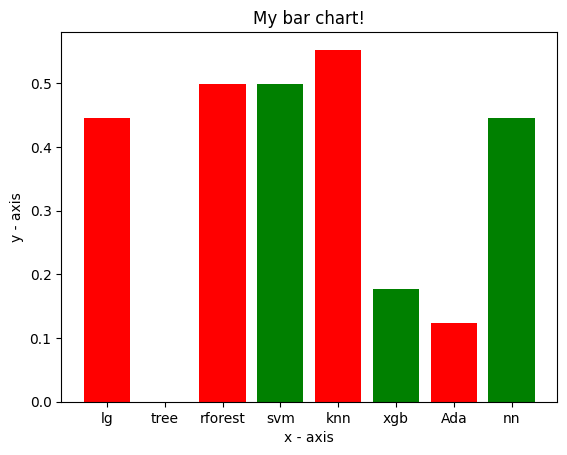

In [ ]:

left_model = [1, 2, 3, 4, 5, 6, 7, 8]

# heights of bars
height_model = [0.4455, 0, 0.4991, 0.4991, 0.5528, 0.1771, 0.1234, 0.4455]

# labels for bars
tick_label = np.array(['lg', 'tree', 'rforest', 'svm', 'knn', 'xgb', 'Ada', 'nn'])

# plotting a bar chart
plt.bar(left_model, height_model, tick_label = tick_label,
        width = 0.8, color = ['red', 'green'])

# naming the x-axis
plt.xlabel('x - axis')
# naming the y-axis
plt.ylabel('y - axis')
# plot title
plt.title('My bar chart!')

# function to show the plot
plt.show()
